In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def get_image_np_array(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    print(path, " is converted to ndArray")
    return img

In [3]:
def create_histogram(one_d_array, num_bins):
    plt.hist(one_d_array, num_bins, facecolor='blue', alpha=0.5)
    plt.show()
    print('Histogram of')

In [4]:
def df(img):
    values = [0] * 256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            values[img[i, j]] += 1
    return values

In [5]:
def cdf(hist):  # cumulative distribution frequency
    cdf = [0] * len(hist)  # len(hist) is 256
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i] = cdf[i - 1] + hist[i]
    # Now we normalize the histogram
    cdf = [ele * 255 / cdf[-1] for ele in cdf]  # What your function h was doing before
    return cdf

In [6]:
img = get_image_np_array('image1.png')
def equalize_image(image):
    my_cdf = cdf(df(img))
    # use linear interpolation of cdf to find new pixel values. Scipy alternative exists
    import numpy as np
    image_equalized = np.interp(image, range(0, 256), my_cdf)
    return image_equalized

image1.png  is converted to ndArray


image1.png  is converted to ndArray


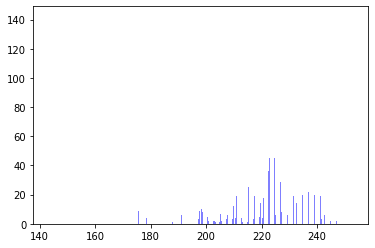

Histogram of


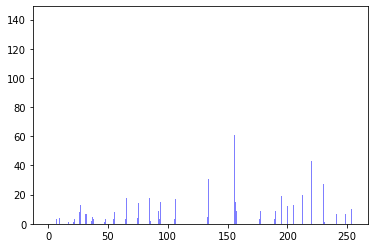

Histogram of


In [7]:
img = get_image_np_array('image1.png')
create_histogram(img, 100)
eq = equalize_image(img)
create_histogram(eq, 100)
cv2.imshow('equalized', eq)
%matplotlib inline
plt

In [ ]:
 img2 = get_image_np_array('image1.png')

# Read the image
img1 = get_image_np_array('image2.jpg')
create_histogram(img1, 100)
# Create zeros array to store the stretched image
minmax_img = np.zeros((img1.shape[0], img1.shape[1]), dtype='uint8')


In [ ]:
# Loop over the image and apply Min-Max formulae
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        minmax_img[i, j] = 255 * (img1[i, j] - np.min(img1)) / (np.max(img1) - np.min(img1))

# Displat the stretched image
create_histogram(minmax_img, 100)
cv2.imshow('Minmax', minmax_img)
cv2.waitKey(0)